In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("FPP_table.csv")

# Planet size distribution

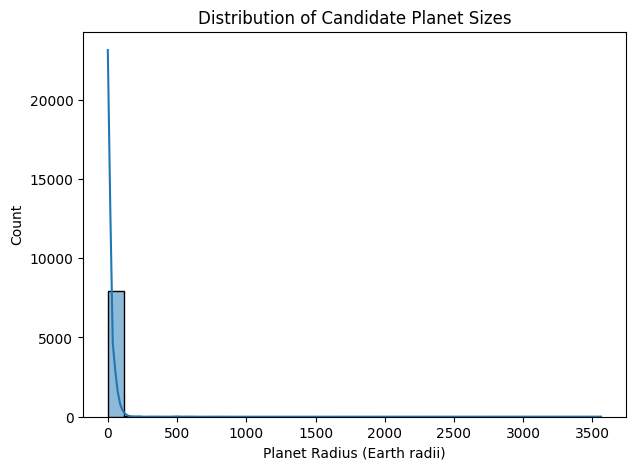

In [3]:
plt.figure(figsize=(7,5))
sns.histplot(df['fpp_prad'], bins=30, kde=True)
plt.xlabel("Planet Radius (Earth radii)")
plt.title("Distribution of Candidate Planet Sizes")
plt.show()

# Orbital period vs planet size

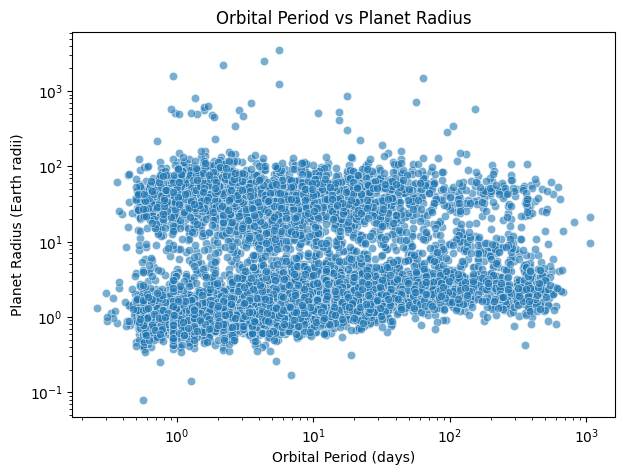

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="fpp_koi_period", y="fpp_prad", data=df, alpha=0.6)
plt.xscale("log")  # orbital period spans wide range
plt.yscale("log")
plt.xlabel("Orbital Period (days)")
plt.ylabel("Planet Radius (Earth radii)")
plt.title("Orbital Period vs Planet Radius")
plt.show()

# False positive probabilities breakdown

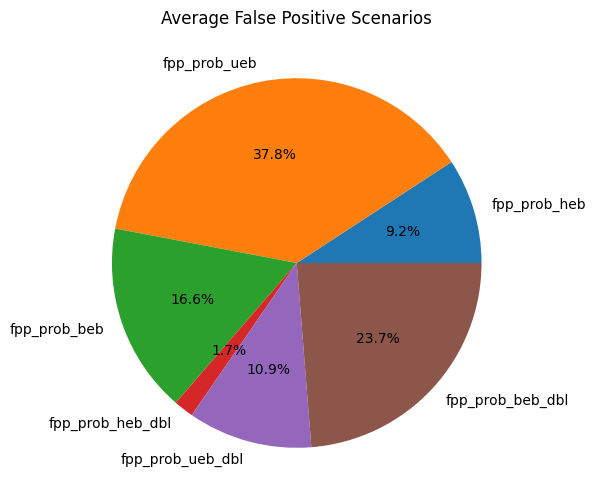

In [5]:
false_pos_cols = ["fpp_prob_heb","fpp_prob_ueb","fpp_prob_beb",
                  "fpp_prob_heb_dbl","fpp_prob_ueb_dbl","fpp_prob_beb_dbl"]

avg_fp = df[false_pos_cols].mean()
avg_fp.plot(kind="pie", autopct="%.1f%%", figsize=(6,6), title="Average False Positive Scenarios")
plt.ylabel("")
plt.show()


# Stellar mass vs radius

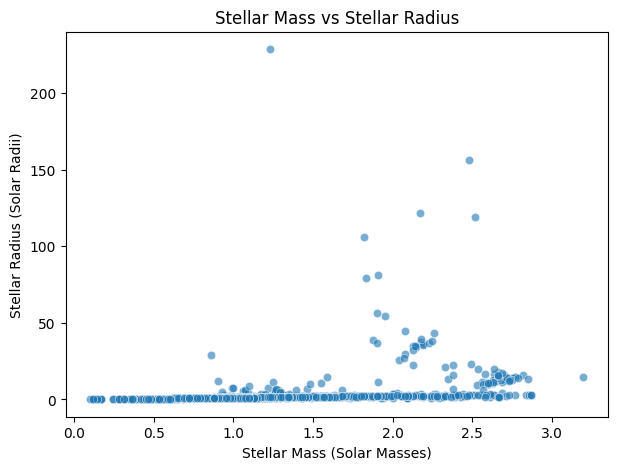

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="fpp_smass", y="fpp_srad", data=df, alpha=0.6)
plt.xlabel("Stellar Mass (Solar Masses)")
plt.ylabel("Stellar Radius (Solar Radii)")
plt.title("Stellar Mass vs Stellar Radius")
plt.show()

# Bubble chart (period vs radius, bubble = false prob)

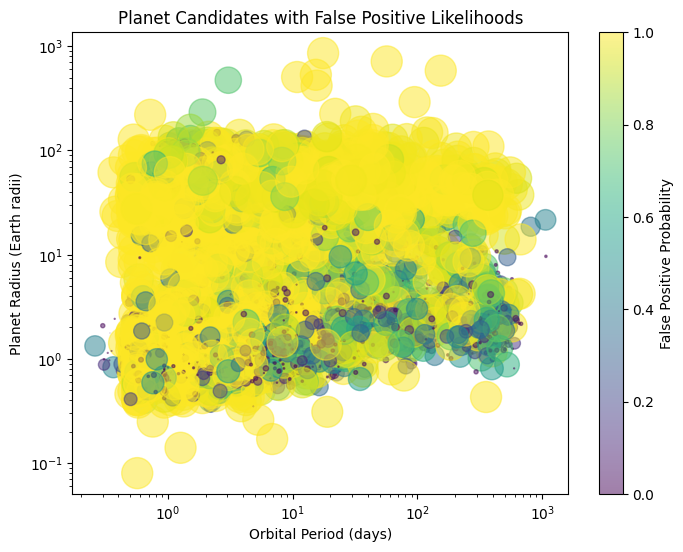

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df["fpp_koi_period"], df["fpp_prad"], 
            s=df["fpp_prob"]*500, alpha=0.5, c=df["fpp_prob"], cmap="viridis")
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="False Positive Probability")
plt.xlabel("Orbital Period (days)")
plt.ylabel("Planet Radius (Earth radii)")
plt.title("Planet Candidates with False Positive Likelihoods")
plt.show()

# Stellar temperature distribution

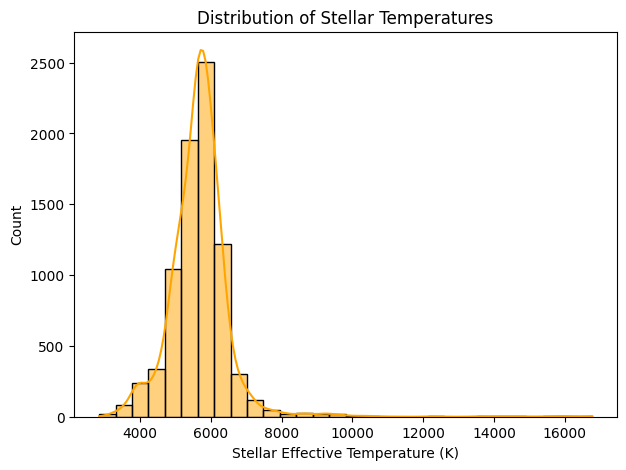

In [8]:
plt.figure(figsize=(7,5))
sns.histplot(df['fpp_steff'], bins=30, kde=True, color="orange")
plt.xlabel("Stellar Effective Temperature (K)")
plt.title("Distribution of Stellar Temperatures")
plt.show()

#  Stellar age distribution

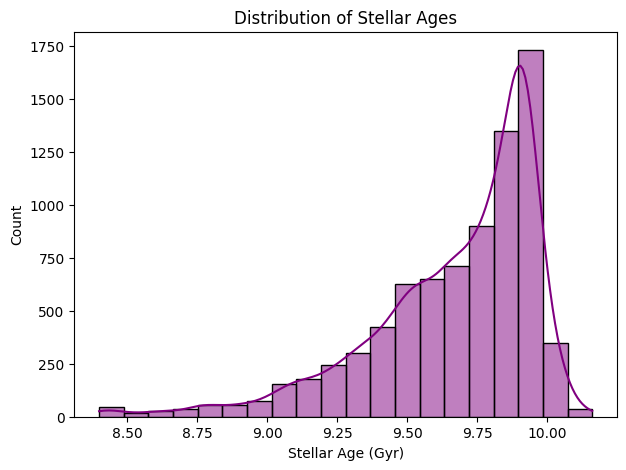

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(df["fpp_sage"], bins=20, kde=True, color="purple")
plt.xlabel("Stellar Age (Gyr)")
plt.title("Distribution of Stellar Ages")
plt.show()

# Distance histogram


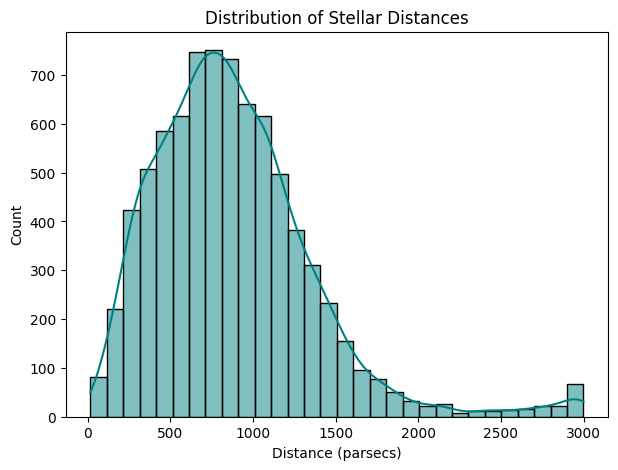

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df["fpp_dist"], bins=30, kde=True, color="teal")
plt.xlabel("Distance (parsecs)")
plt.title("Distribution of Stellar Distances")
plt.show()

# Extinction distribution (Av)

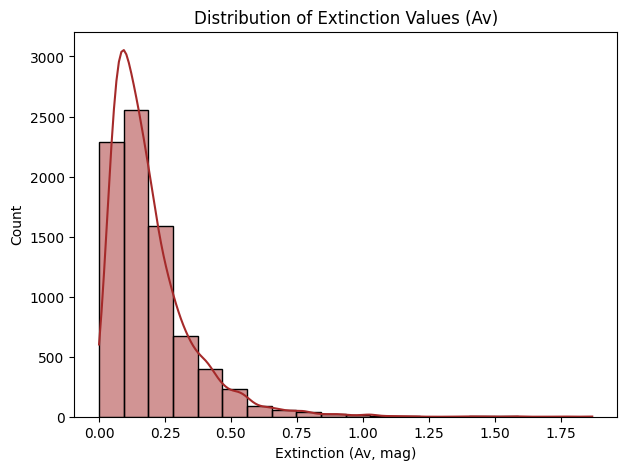

In [12]:
plt.figure(figsize=(7,5))
sns.histplot(df["fpp_av"], bins=20, kde=True, color="brown")
plt.xlabel("Extinction (Av, mag)")
plt.title("Distribution of Extinction Values (Av)")
plt.show()

# Planet radius vs stellar temperature

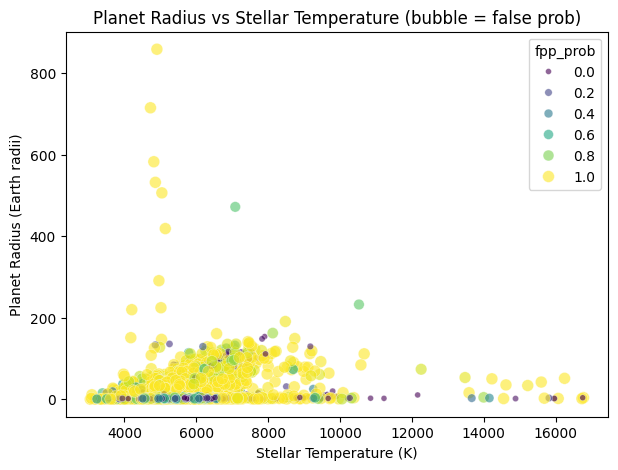

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="fpp_steff", y="fpp_prad", size="fpp_prob", data=df, alpha=0.6, hue="fpp_prob", palette="viridis")
plt.xlabel("Stellar Temperature (K)")
plt.ylabel("Planet Radius (Earth radii)")
plt.title("Planet Radius vs Stellar Temperature (bubble = false prob)")
plt.show()


# Correlation heatmap

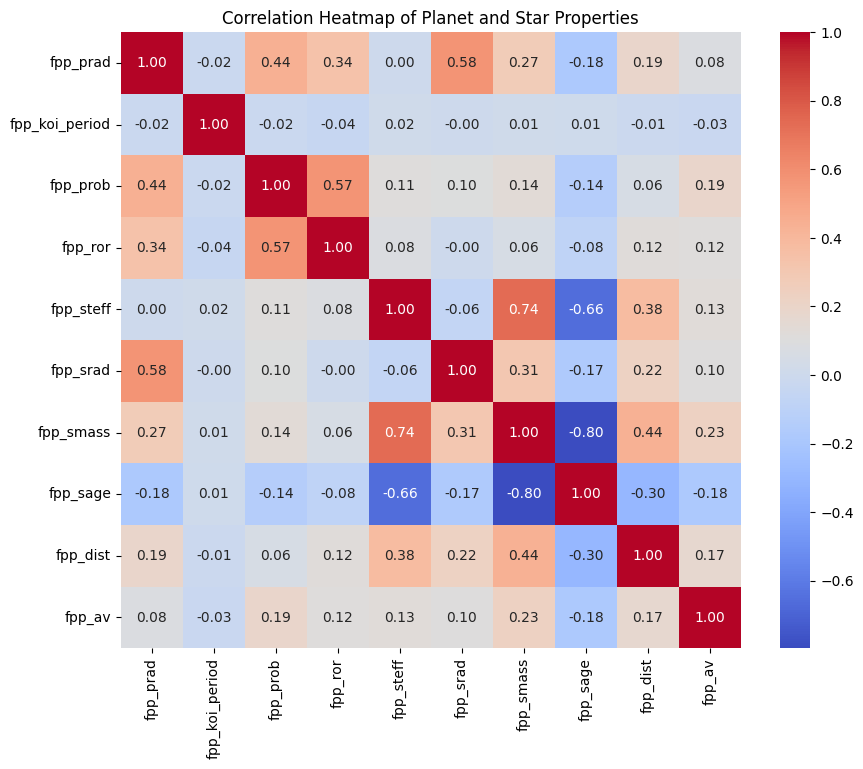

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["fpp_prad","fpp_koi_period","fpp_prob","fpp_ror",
                "fpp_steff","fpp_srad","fpp_smass","fpp_sage","fpp_dist","fpp_av"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Planet and Star Properties")
plt.show()

In [15]:
# Select important features
features = [
    "fpp_prad", "fpp_koi_period", "fpp_prob", "fpp_ror",
    "fpp_steff", "fpp_srad", "fpp_smass", "fpp_sage",
    "fpp_dist", "fpp_av", "fpp_prob_heb", "fpp_prob_ueb", "fpp_prob_beb"
]

X = df[features]

# Example: create target (planet vs false positive)
df["target"] = np.where(df["fpp_prob"] < 0.1, 1, 0)  # 1=planet, 0=false positive
y = df["target"]

print(X.head())
print(y.value_counts())


   fpp_prad  fpp_koi_period      fpp_prob  fpp_ror  fpp_steff  fpp_srad  \
0      0.82           9.748  9.500000e-01    0.010     5212.0      0.75   
1     14.58          19.193  8.600000e-01    0.126     5851.0      1.06   
2     11.87          22.418  1.400000e-02    0.112     5655.0      0.97   
3     42.75          20.131  9.900000e-01    0.392     5747.0      1.00   
4      3.78           6.010  5.700000e-08    0.047     4829.0      0.74   

   fpp_smass  fpp_sage  fpp_dist  fpp_av  fpp_prob_heb  fpp_prob_ueb  \
0       0.83      9.30     457.0    0.15  1.400000e-08  1.900000e-08   
1       1.01      9.68    1015.0    0.34  6.700000e-02  7.900000e-01   
2       0.96      9.82     686.0    0.52  4.600000e-04  8.900000e-03   
3       0.97      9.78     869.0    0.07  6.300000e-02  9.300000e-01   
4       0.77      9.84     364.0    0.10  3.600000e-09  1.400000e-19   

   fpp_prob_beb  
0  1.800000e-01  
1  2.000000e-03  
2  4.800000e-03  
3  1.100000e-03  
4  5.300000e-08  
target
1

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


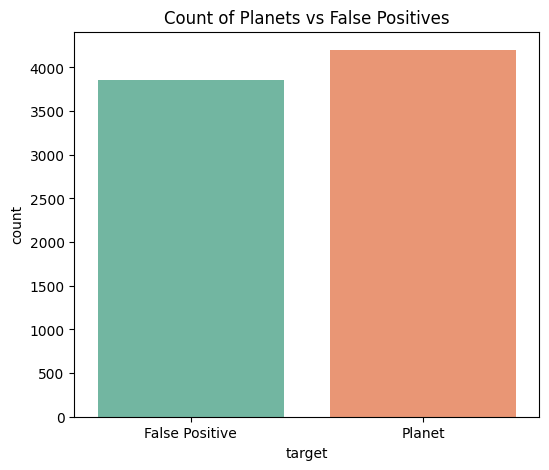

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


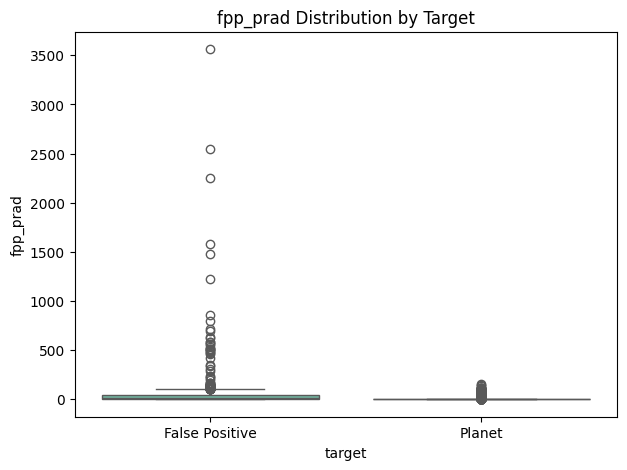

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


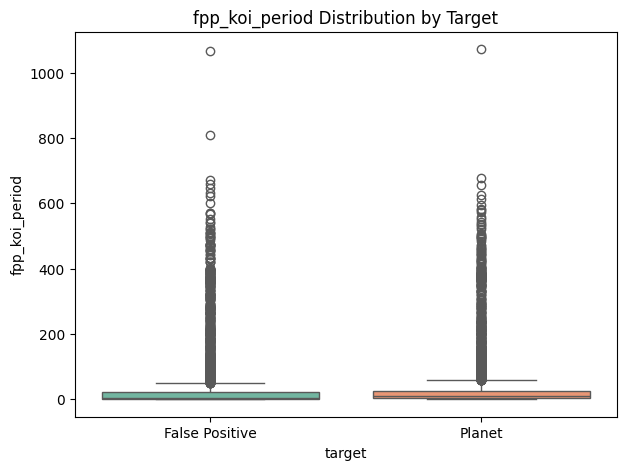

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


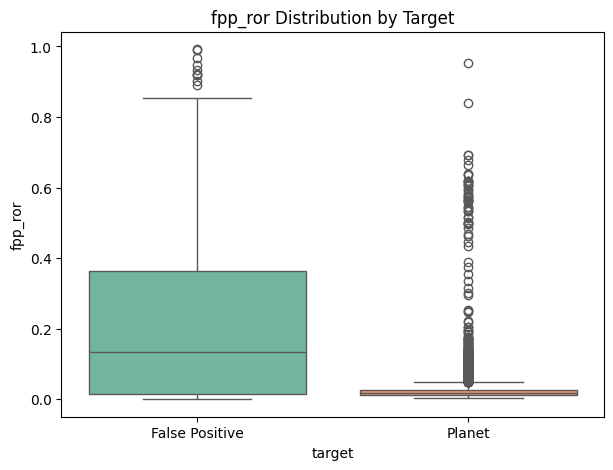

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


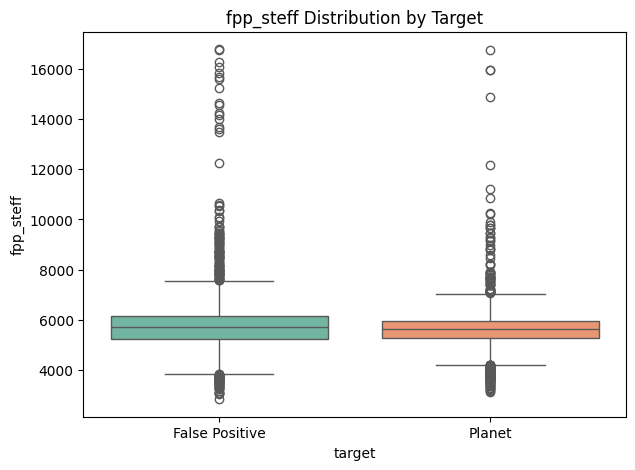

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


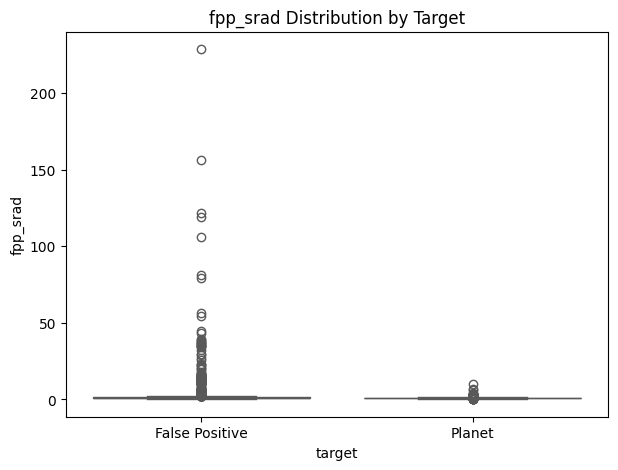

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


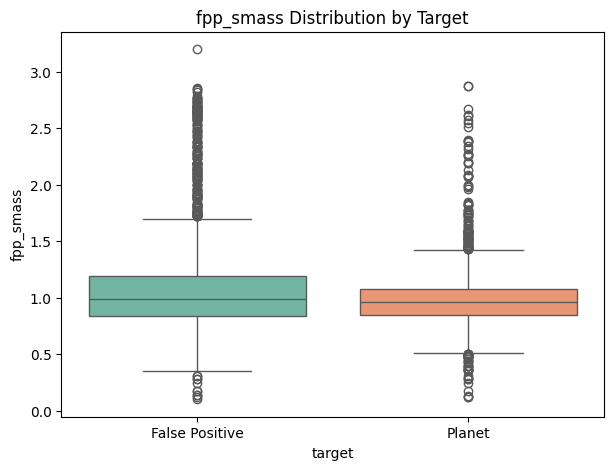

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


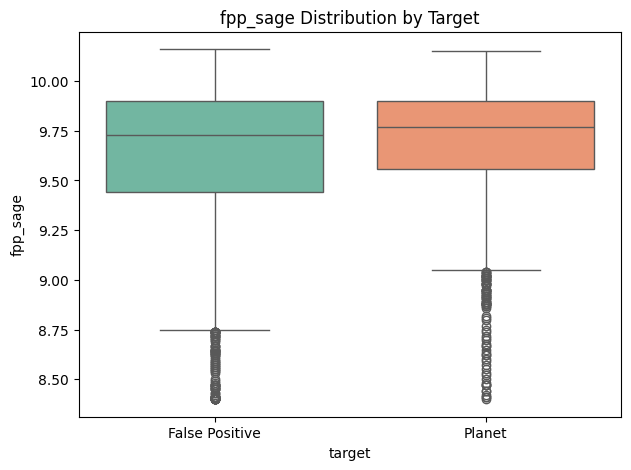

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


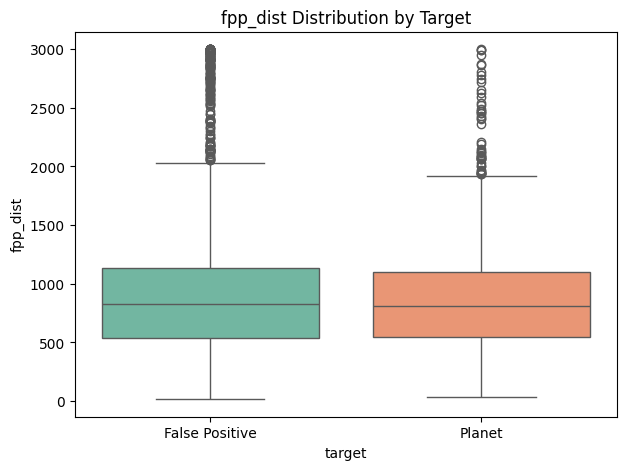

C:\Users\saqib\AppData\Local\Temp\ipykernel_27332\1541886020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")


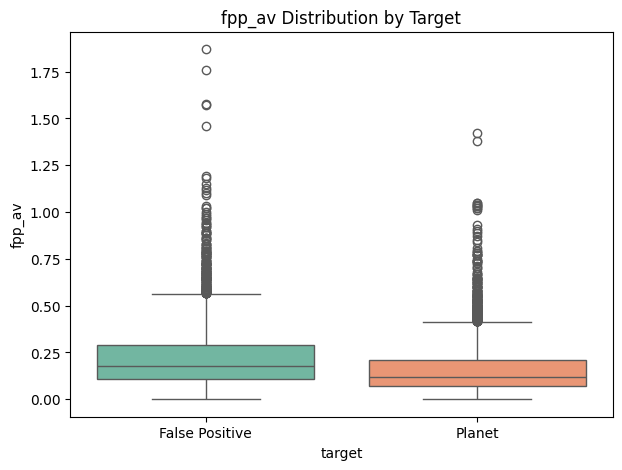

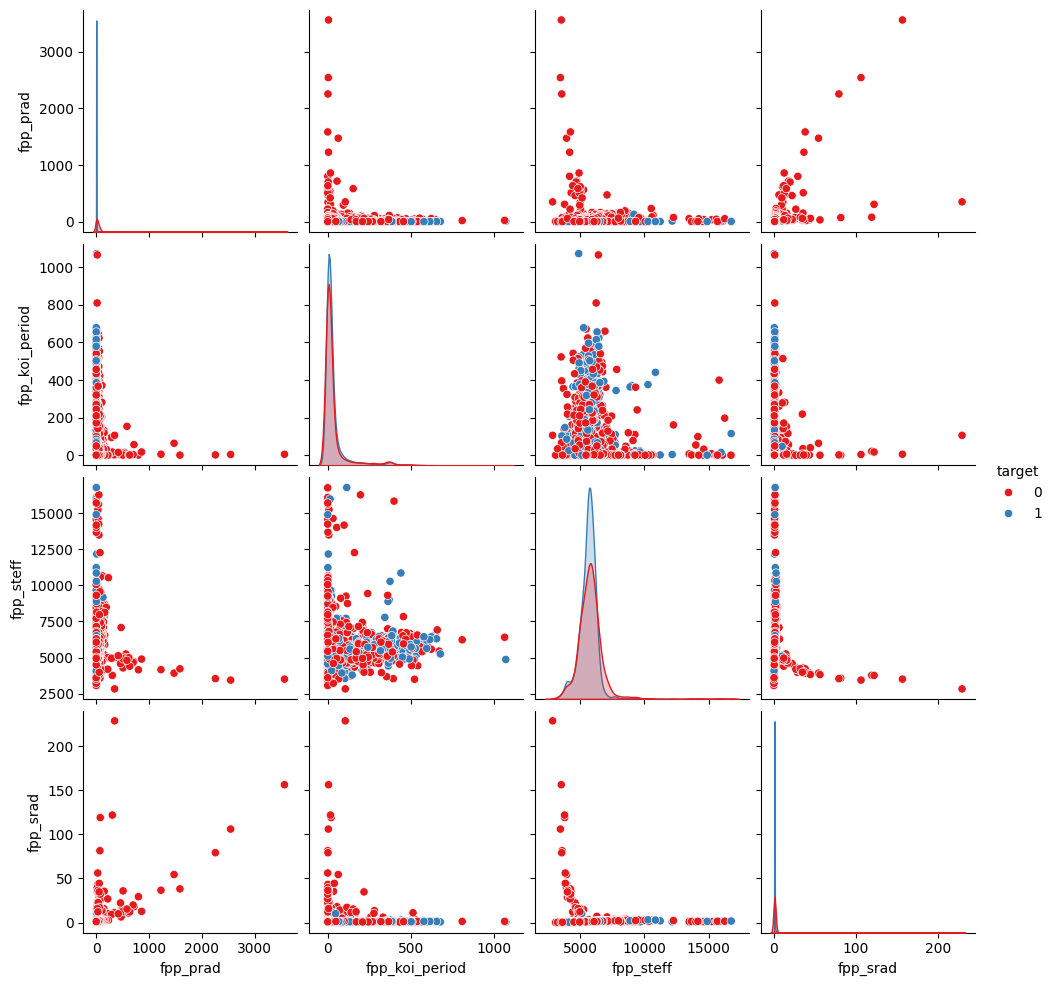

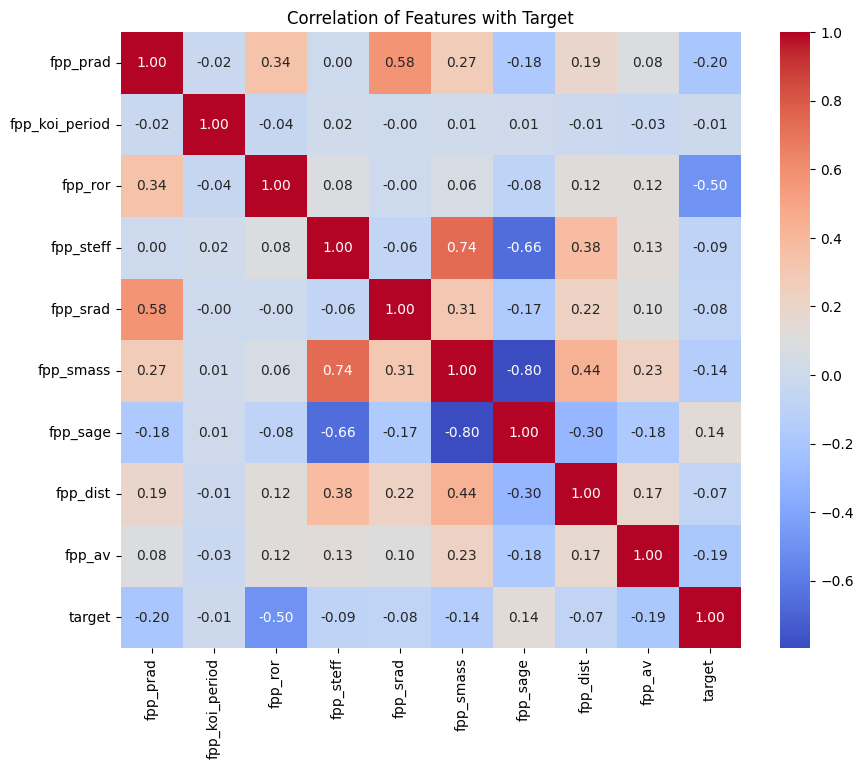

In [16]:
# Create a synthetic target label based on fpp_prob
df["target"] = np.where(df["fpp_prob"] < 0.1, 1, 0)  # 1 = planet, 0 = false positive

# Features to analyze
features = [
    "fpp_prad", "fpp_koi_period", "fpp_ror",
    "fpp_steff", "fpp_srad", "fpp_smass", "fpp_sage",
    "fpp_dist", "fpp_av"
]

# 1. Countplot of planet vs false positive
plt.figure(figsize=(6,5))
sns.countplot(x="target", data=df, palette="Set2")
plt.xticks([0,1], ["False Positive","Planet"])
plt.title("Count of Planets vs False Positives")
plt.show()

# 2. Boxplots for numeric features grouped by target
for col in features:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="target", y=col, data=df, palette="Set2")
    plt.xticks([0,1], ["False Positive","Planet"])
    plt.title(f"{col} Distribution by Target")
    plt.show()

# 3. Pairplot for selected features
sns.pairplot(df[["fpp_prad","fpp_koi_period","fpp_steff","fpp_srad","target"]], 
             hue="target", palette="Set1", diag_kind="kde")
plt.show()

# 4. Correlation heatmap with target
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ["target"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with Target")
plt.show()
